In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


bfs = pd.read_csv("C:/Users/asure/Downloads/train.csv/train.csv")

In [26]:
bfs = pd.read_csv("/content/train.csv")

In [27]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [28]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [29]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [30]:
bfs.duplicated().value_counts()

False    550068
dtype: int64

In [31]:
bfs.rename(columns=str.lower,inplace=True)

In [32]:
bfs.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [33]:
bfs.user_id

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: user_id, Length: 550068, dtype: int64

In [ ]:
bfs.product_id

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: product_id, Length: 550068, dtype: object

In [ ]:
bfs.marital_status.unique()


array([0, 1])

In [ ]:
bfs[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  int64  
 1   product_category_2  376430 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


In [ ]:
bfs.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [ ]:
a=bfs.groupby('age')['product_category_2'].agg(pd.Series.mode)
b=bfs.groupby('age')['product_category_3'].agg(pd.Series.mode)
c=bfs.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
d=bfs.groupby('occupation')['product_category_3'].agg(pd.Series.mode)

In [ ]:
c=bfs.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
a

age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
Name: product_category_2, dtype: float64

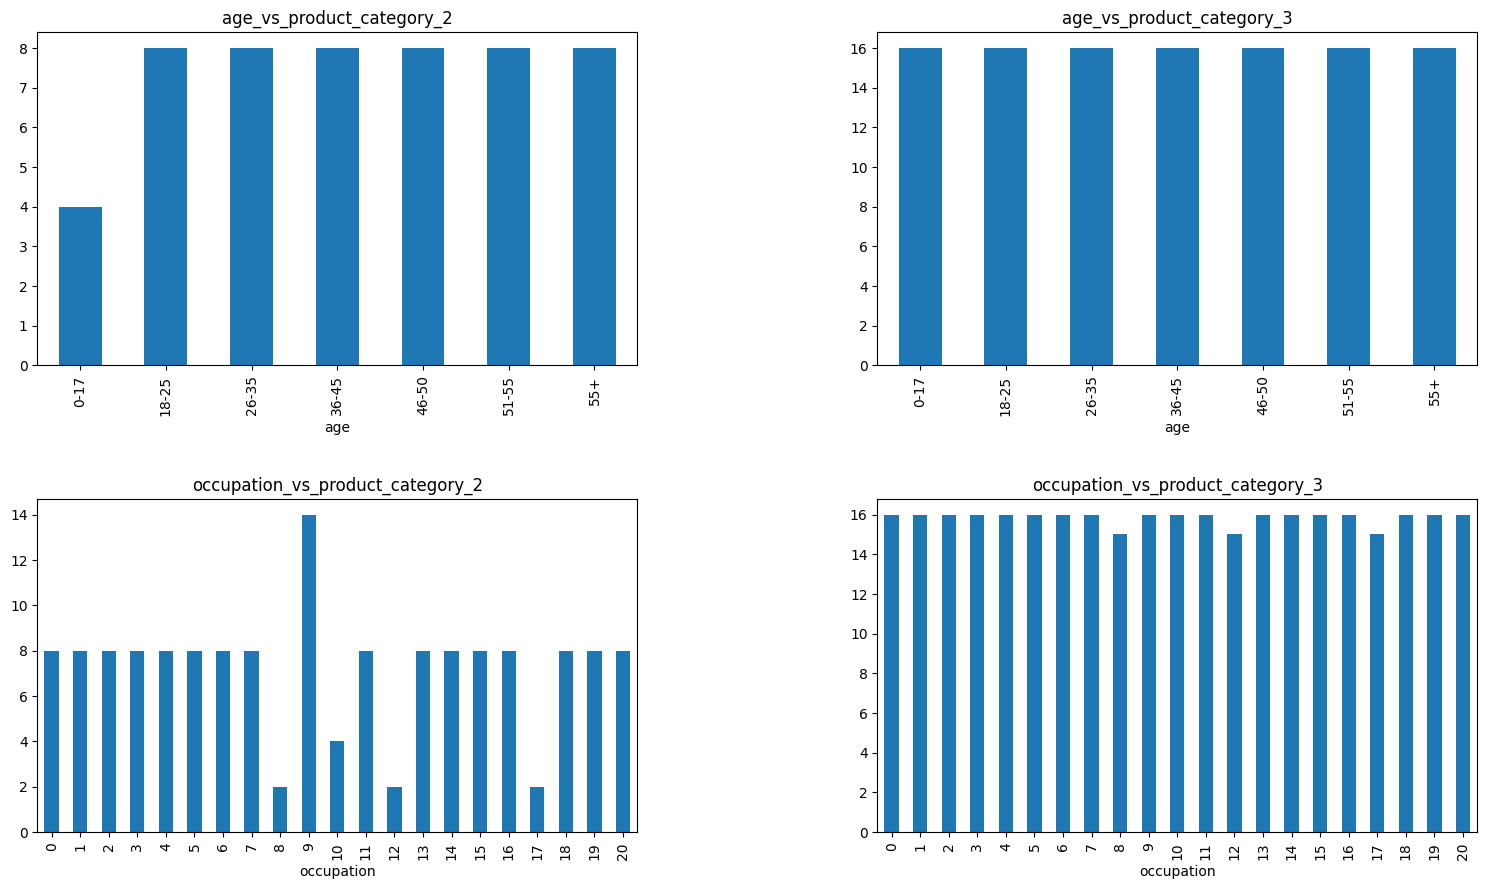

In [ ]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
a.plot(kind='bar',title="age_vs_product_category_2")
plt.subplot(2,2,2)
b.plot(kind='bar',title="age_vs_product_category_3")
plt.subplot(2,2,3)
c.plot(kind='bar',title="occupation_vs_product_category_2")
plt.subplot(2,2,4)
d.plot(kind='bar',title="occupation_vs_product_category_3")
plt.show()

In [ ]:
def fill_nan_category(category_colunm):
    x=bfs.groupby('occupation')[category_colunm].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        bfs.loc[bfs['occupation']==i,category_colunm]=bfs.loc[bfs['occupation']==i,category_colunm].fillna(j)

In [ ]:
fill_nan_category('product_category_1')
fill_nan_category('product_category_2')
fill_nan_category('product_category_3')
bfs.product_category_1=bfs.product_category_1.astype(float)

In [ ]:
bfs[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  550068 non-null  float64
 1   product_category_2  550068 non-null  float64
 2   product_category_3  550068 non-null  float64
dtypes: float64(3)
memory usage: 12.6 MB


In [ ]:
bfs.purchase.unique(),bfs.purchase.isnull().count()

(array([ 8370, 15200,  1422, ...,   135,   123,   613]), 550068)

In [ ]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     550068 non-null  int64  
 1   product_id                  550068 non-null  object 
 2   gender                      550068 non-null  object 
 3   age                         550068 non-null  object 
 4   occupation                  550068 non-null  int64  
 5   city_category               550068 non-null  object 
 6   stay_in_current_city_years  550068 non-null  object 
 7   marital_status              550068 non-null  int64  
 8   product_category_1          550068 non-null  float64
 9   product_category_2          550068 non-null  float64
 10  product_category_3          550068 non-null  float64
 11  purchase                    550068 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 50.4+ MB


In [ ]:
bfs.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,8.0,16.0,7969


In [ ]:
bfs.to_csv('./bfs_clean_data.csv')

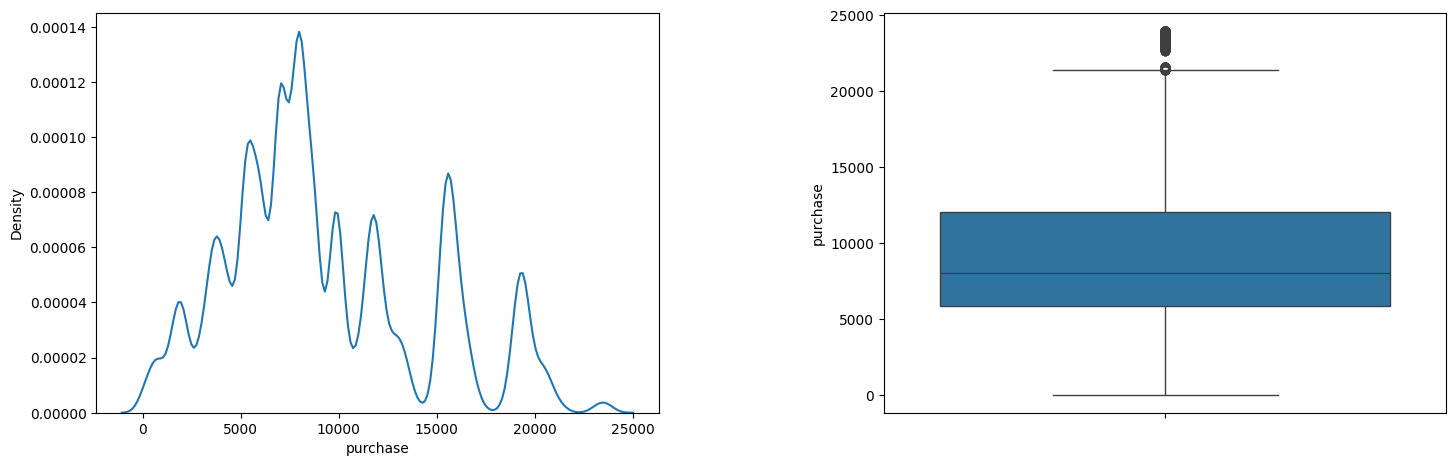

In [ ]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,2,1)
sns.kdeplot(data=bfs['purchase'])
plt.subplot(1,2,2)
sns.boxplot(y='purchase',data=bfs)
plt.show()

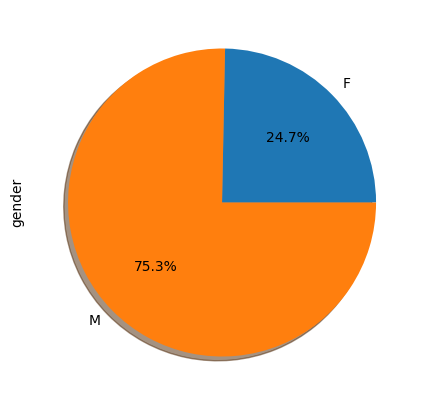

In [ ]:
bfs.groupby('gender').agg({'gender':'count'}).gender.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

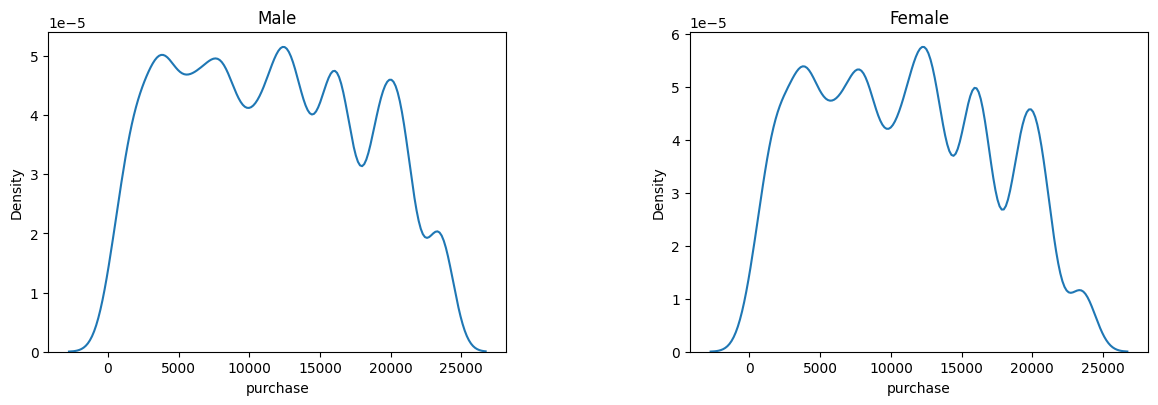

In [ ]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
ma=bfs[bfs['gender']=='M'].value_counts('purchase').reset_index()
fe=bfs[bfs['gender']=='F'].value_counts('purchase').to_frame()
plt.subplot(1,2,1)
sns.kdeplot(data=ma, x='purchase').set_title('Male')
plt.subplot(1,2,2)
sns.kdeplot(data=fe, x='purchase').set_title('Female')
plt.show()

,gender,purchase
0,F,1186232642
1,M,3909580100


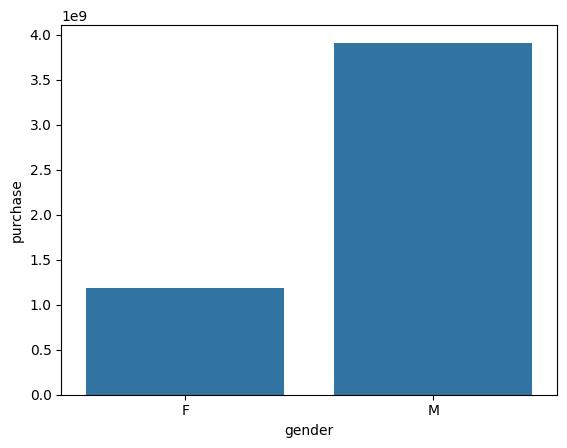

In [ ]:
p=bfs.groupby('gender').agg({'purchase':sum}).reset_index()
sns.barplot(x='gender',y='purchase',data=p)
p

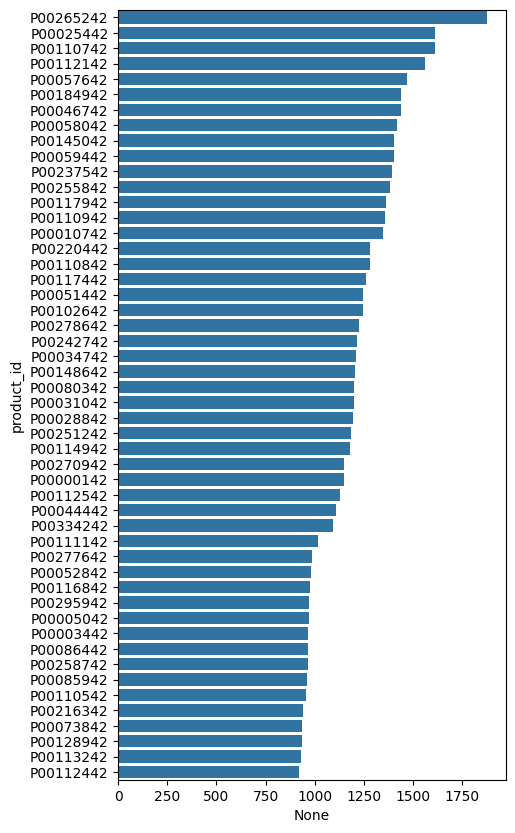

In [ ]:
p_id=bfs.value_counts('product_id').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

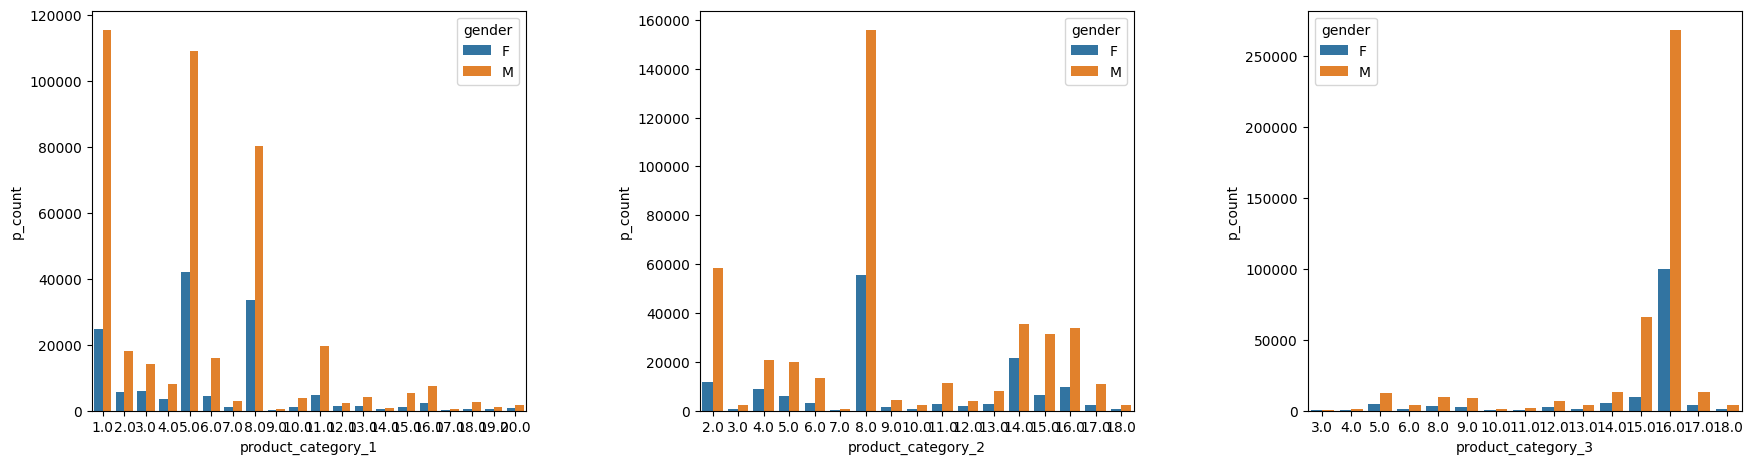

In [ ]:
c1=bfs.groupby('gender')['product_category_1'].value_counts().to_frame().rename(columns={"product_category_1":'p_count'}).reset_index()
c2=bfs.groupby('gender')['product_category_2'].value_counts().to_frame().rename(columns={"product_category_2":'p_count'}).reset_index()
c3=bfs.groupby('gender')['product_category_3'].value_counts().to_frame().rename(columns={"product_category_3":'p_count'}).reset_index()
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(1,3,1)
sns.barplot(x='product_category_1',y='p_count',hue='gender',data=c1)
plt.subplot(1,3,2)
sns.barplot(x='product_category_2',y='p_count',hue='gender',data=c2)
plt.subplot(1,3,3)
sns.barplot(x='product_category_3',y='p_count',hue='gender',data=c3)
plt.show()

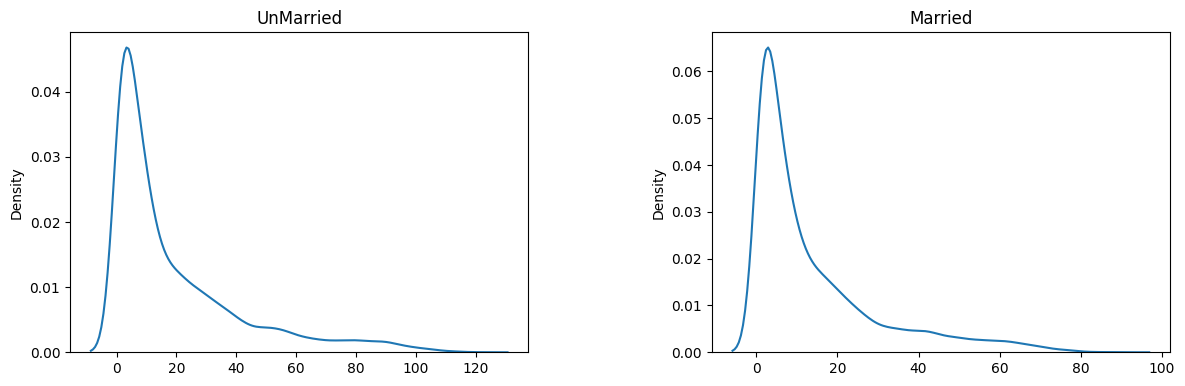

In [ ]:
UM_P = bfs[bfs['marital_status'] == 0].value_counts('purchase')
M_P = bfs[bfs['marital_status'] == 1].value_counts('purchase')

plt.figure(figsize=(10, 4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

sns.kdeplot(UM_P, ax=ax1).set_title('UnMarried')
sns.kdeplot(M_P, ax=ax2).set_title('Married')

plt.show()

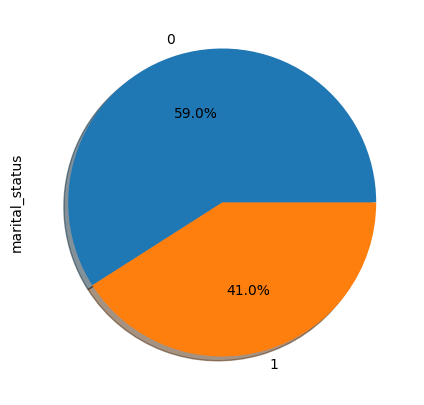

In [ ]:
bfs.groupby('marital_status').agg({'marital_status':'count'}).marital_status.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

In [ ]:
bfs.head(1)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370


,gender,marital_status,purchase
0,F,0,684154127
1,F,1,502078515
2,M,0,2324773320
3,M,1,1584806780


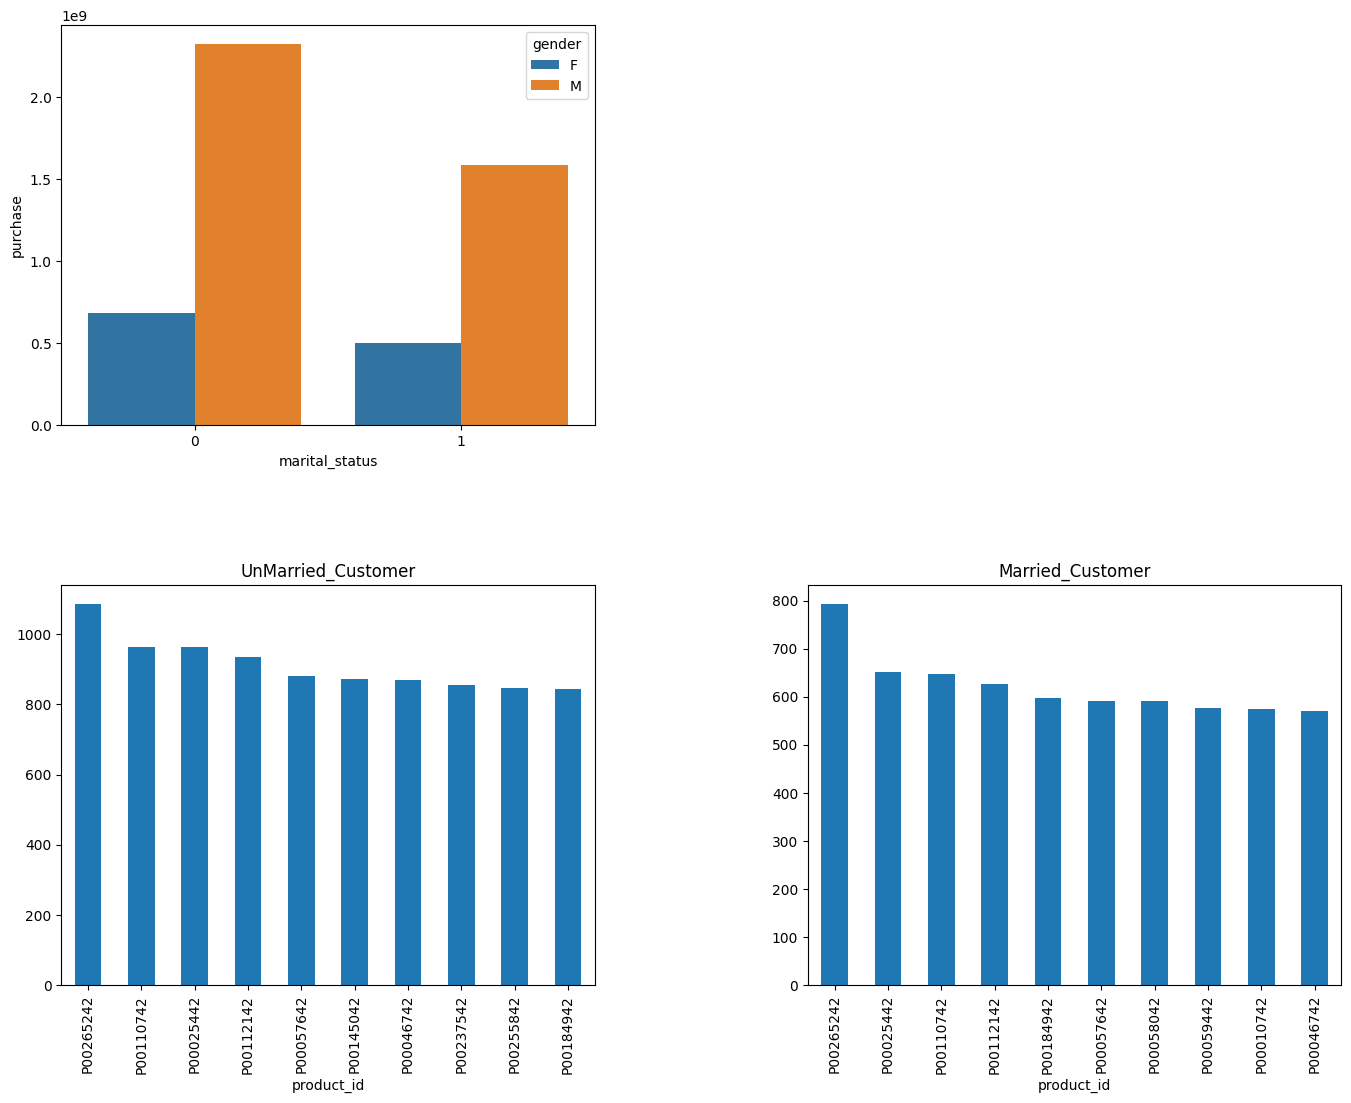

In [ ]:
M_UM_P=bfs.groupby(['gender','marital_status']).agg({'purchase':sum}).reset_index()
UM=bfs[bfs['marital_status']==0].value_counts('product_id').nlargest(10)
M=bfs[bfs['marital_status']==1].value_counts('product_id').nlargest(10)
plt.subplots_adjust(left=1,
                    bottom=1,
                    right=3,
                    top=3,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2,2,1)
sns.barplot(x='marital_status',y='purchase',hue='gender',data=M_UM_P)
plt.subplot(2,2,3)
UM.plot(x=UM.index,y=UM,kind='bar',title='UnMarried_Customer')
plt.subplot(2,2,4)
M.plot(x=M.index,y=M,kind='bar',title='Married_Customer')
M_UM_P

In [10]:
from sklearn.model_selection import train_test_split

In [13]:
X = pd.read_csv('/content/train.csv')
y = pd.read_csv('/content/train.csv')

In [14]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [15]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (385047, 12) &  Size of Y training set (385047, 12)


In [16]:
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

Shape of X testing set (165021, 12) &  Size of Y testing set (165021, 12)


In [17]:
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [18]:
print(type(X_trainset))
print(type(y_trainset))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [19]:
X_trainset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
17313,1002731,P00349442,M,36-45,7,C,1,0,6,8.0,NaN,16104
499227,1004868,P00247142,M,36-45,17,C,1,1,8,15.0,16.0,10071
542230,1005496,P00263142,M,26-35,7,B,1,0,5,NaN,NaN,5299
478739,1001717,P00111542,F,51-55,6,B,1,0,2,17.0,NaN,6466
509344,1000463,P00117942,M,26-35,7,A,4+,1,5,15.0,NaN,7108


In [20]:
for column in X_trainset.columns:
    try:
        X_trainset[column].astype(float)
    except ValueError:
        print(f"Column '{column}' contains non-numeric values.")

Column 'Product_ID' contains non-numeric values.
Column 'Gender' contains non-numeric values.
Column 'Age' contains non-numeric values.
Column 'City_Category' contains non-numeric values.
Column 'Stay_In_Current_City_Years' contains non-numeric values.


In [21]:
X_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385047 entries, 17313 to 71530
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     385047 non-null  int64  
 1   Product_ID                  385047 non-null  object 
 2   Gender                      385047 non-null  object 
 3   Age                         385047 non-null  object 
 4   Occupation                  385047 non-null  int64  
 5   City_Category               385047 non-null  object 
 6   Stay_In_Current_City_Years  385047 non-null  object 
 7   Marital_Status              385047 non-null  int64  
 8   Product_Category_1          385047 non-null  int64  
 9   Product_Category_2          263610 non-null  float64
 10  Product_Category_3          117002 non-null  float64
 11  Purchase                    385047 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 38.2+ MB


In [34]:
bfs.dtypes

user_id                         int64
product_id                     object
gender                         object
age                            object
occupation                      int64
city_category                  object
stay_in_current_city_years     object
marital_status                  int64
product_category_1              int64
product_category_2            float64
product_category_3            float64
purchase                        int64
dtype: object

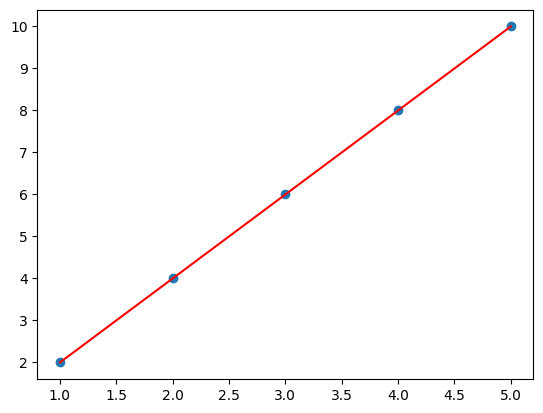

Coefficients: [2.]
Intercept: 0.0


In [40]:
# prompt: linear regression code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a sample dataset
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 6, 8, 10]
})

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(data['x'].values.reshape(-1, 1), data['y'])

# Make predictions
y_pred = model.predict(data['x'].values.reshape(-1, 1))

# Plot the data and the fitted line
plt.scatter(data['x'], data['y'])
plt.plot(data['x'], y_pred, color='red')
plt.show()

# Print the coefficients and intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


In [41]:
bfs.select_dtypes(include='object').columns

Index(['product_id', 'gender', 'age', 'city_category',
       'stay_in_current_city_years'],
      dtype='object')